In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice pada data sample submission) lalu interpretasikan!

In [ ]:
data = pd.read_csv("sample_submission.csv", sep=',')
data.dropna(axis=1)
data.head(10)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [ ]:
x = data["SalePrice"].apply(int)
x.describe()

count      1459.000000
mean     179183.413297
std       16518.313057
min      135751.000000
25%      168702.500000
50%      179208.000000
75%      186789.000000
max      281643.000000
Name: SalePrice, dtype: float64

In [ ]:
print("IQR:", x.quantile(0.75) - x.quantile(0.25))

IQR: 18086.5


Dari data tersebut dapat terlihat bahwa ada 1459 data mengenai harga rumah. Untuk rata-rata harga jual rumah berada di 179183.41. Harga termurah berada di 135751, Harga termahal berada di 281643, sedangkan untuk harga tengah (*median*) itu sebesar 179208. Untuk Interquantile berada di 18086.5. 

# 2. Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot dan plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)

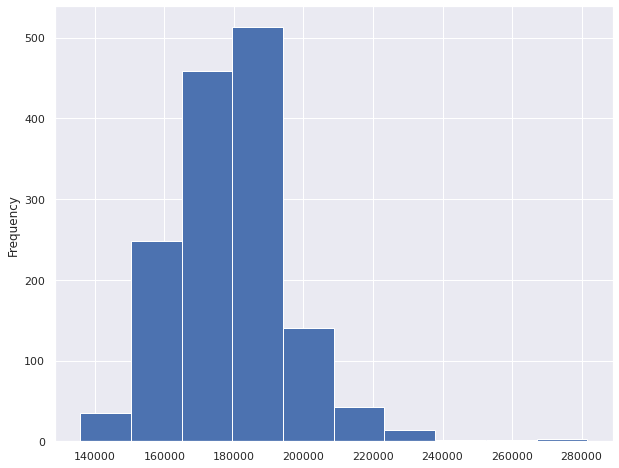

In [ ]:
# membuat histogram plot
sns.set()
plt.figure(figsize = (10,8))
data["SalePrice"].plot.hist()
plt.show()

Dari isi kolom variabel dapat dilihat bahwa pesebaran (distirbusi) cukup beragam dimana bisa dilihat bahwa ada 3 bagain yaitu ada beberapa nilai (tidak terlalu banyak) yang dibawah 135751 (harga minimum); lalu ada beberapa harga Sale Price yang ada direntang 168702 - 186789; dan ada harga yang outlier karena diatas harga maximum (diatas 281643). 

Menurut saya untuk analisa distribusi harga rumah bisa dilakukan oleh kedua nya (baik *mean* maupun *median*, karena kedua nilai tersebut berada di dalam rentang Interquantile (berada di dalam rentang harga 168702 - 186789). 
Namun lebih baik menggunakan *mean* sebagai acuannya, karena ini mengenai harga jual rumah. Karena menurut saya, bentuk pemikiran orang langsung tertuju apakah harga jual rumah ini diatas rata-rata harga jual rumah lainnya atau tidak.

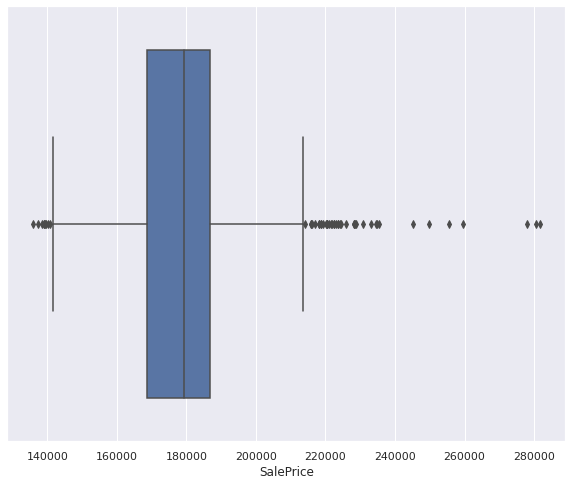

In [ ]:
plt.figure (figsize = (10,8))
sns.boxplot(x = "SalePrice", data = data)
plt.show()

# 3. Lakukan sampling untuk data tersebut dengan margin of error 5%! Lakukan pengujian hipotesis untuk harga rumah (Kolom: SalePrice).

In [ ]:
data.shape

(1459, 2)

In [ ]:
#mencari nilai Slovin
k = 1459 / (1+1459 * 0.05 ** 2)
k

313.93222162452923

In [ ]:
data.sample(n = 314).sort_index()

,Id,SalePrice
0,1461,169277.052498
2,1463,183583.683570
10,1471,157933.279456
11,1472,145291.245020
14,1475,150891.638244
...,...,...
1451,2912,188506.431412
1452,2913,172917.456816
1453,2914,166274.325226
1454,2915,167081.220949


Akan dilakukan uji Hipotesis dimana Uji Hipotesis adalah metode pengambilan keputusan yang didasarkan dari analisis data, baik dari percobaan yang terkontrol, maupun dari observasi (tidak terkontrol).
Dimana: 
*   H0 = Kebanyakan Harga dijual diatas rata-rata
*   H1 = Kebanyakan Harga dijual dibawah rata-rata



In [ ]:
import scipy.stats as st

In [ ]:
?st.ttest_ind

In [ ]:
mean = np.mean(data["SalePrice"])
mean

179183.91824266282

In [ ]:
mean = int(mean)
mean

179183

In [ ]:
upper_mean = data[data["SalePrice"].astype(int) >= mean]
lower_mean = data[data["SalePrice"].astype(int) < mean]
print(upper_mean)
print(lower_mean)

        Id      SalePrice
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
15    1476  179460.965187
16    1477  185034.628914
...    ...            ...
1448  2909  196526.002999
1451  2912  188506.431412
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[735 rows x 2 columns]
        Id      SalePrice
0     1461  169277.052498
4     1465  150730.079977
5     1466  177150.989247
6     1467  172070.659229
7     1468  175110.956520
...    ...            ...
1450  2911  165086.775062
1452  2913  172917.456816
1453  2914  166274.325226
1454  2915  167081.220949
1455  2916  164788.778231

[724 rows x 2 columns]


In [ ]:
upper_mean.mean()

Id             2237.526531
SalePrice    191089.346821
dtype: float64

In [ ]:
lower_mean.mean()

Id             2141.751381
SalePrice    167097.606081
dtype: float64

In [ ]:
uji_t = st.ttest_ind(a = upper_mean["SalePrice"], b = lower_mean["SalePrice"])
P_value = uji_t.pvalue
print("Nilai P-value:", p_value)

Nilai P-value: 1.3605800103360542e-239


In [ ]:
if p_value >= 0.05:
  print("Terima H0")
else:
  print("Tolak H0")

Tolak H0


Jadi berdasarkan uji hipotesis yang telah dilakukan diatas maka dapat disimpulkan bahwa Kebanyakan Harga dijual dibawah rata-rata (dimana tolak H0 -> terima H1).

# 4. Distribusi ini memiliki ciri-ciri memberikan 2 hasil yakni sukses dan gagal dan memiliki jumlah percobaan sebanyak satu. Distribusi ini adalah

* (a) Poisson
* **(b) Binomial (v)**
* (c) Bernoulli
* (d) Uniform
* (e) Chi-Square



# 5. Berikut ini yang bukan merupakan ciri-ciri kurva distribusi normal adalah
* (a) Memiliki pola kurva yang asimetris
* **(b) Memiliki asimtot datar sumbu y (v)**
* (c) Luas kurva sebelah kanan dan kiri masing-masing 0,5
* (d) Kurva selalu berada di atas sumbu x
* (e) Luas kurva sama dengan 1

# 6. Peluang seseorang mengidap penyakit tertentu adalah 0,008. Berapa peluang bahwa terdapat 25 orang mengidap penyakit ini dari total 2000 orang?
* (a) 0,0092
* (b) 0,092
* (c) 0,92
* **(d) 0,028 (v)**
* (e) 0,0028